In [1]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext rpy2.ipython

os.chdir('/home/cole/Documents/citeseq-code/')
print(os.getcwd())

/home/cole/Documents/citeseq-code


In [2]:
#naive = anndata.read_loom("./naive10xdata/naive10xdata/velocyto/naive10xdata.loom")
#p4 = anndata.read_loom("./p4hr10xdata/p4hr10xdata/velocyto/p4hr10xdata.loom") 
#mp4 = anndata.read_loom("./mp4hr10xdata/velocyto/mp4hr10xdata.loom") 
p24 = anndata.read_loom("./p24hr10xdata/p24hr10xdata/velocyto/p24hr10xdata.loom") 
mp24 = anndata.read_loom("./mp24hr10xdata/mp24hr10xdata/velocyto/mp24hr10xdata.loom") 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
sample_obs = pd.read_csv("./cellID_obs.csv")
umap_cord = pd.read_csv("./cell_embeddings.csv")
cell_clusters = pd.read_csv("./clusters.csv")

In [4]:
cell_clusters = cell_clusters.rename(columns = {'x': 'cluster'})
cell_clusters = pd.concat([sample_obs, cell_clusters['cluster']], axis=1)
cell_clusters = cell_clusters.rename(columns = {'x': 'Cell ID'})

print(cell_clusters)

                       Cell ID cluster
0     naive_AAATGGACAACTAGAA-1      N3
1     naive_AAATGGACAGTCGAGA-1      N3
2     naive_AACACACAGACTTGTC-1      N3
3     naive_AACCACAGTGAATTGA-1      N1
4     naive_AACGTCAAGCTGGAGT-1      N3
...                        ...     ...
6478   mp24_TTTGGTTCACTCCTTG-1      N2
6479   mp24_TTTGGTTCAGAGGACT-1      N0
6480   mp24_TTTGGTTTCATGAGGG-1      N0
6481   mp24_TTTGTTGAGGTGCGAT-1      N2
6482   mp24_TTTGTTGTCCGTGGGT-1      N0

[6483 rows x 2 columns]


In [5]:
cellID_obs_p24 = sample_obs[sample_obs['x'].str.contains("p24_")]
cellID_obs_mp24 = sample_obs[sample_obs['x'].str.contains("mp24_")]

# rename barcodes to match the loom files
cellID_obs_p24['x'] = cellID_obs_p24['x'].str.replace('p24_', 'p24hr10xdata:')
cellID_obs_p24['x'] = cellID_obs_p24['x'].str.replace('-1', 'x')
cellID_obs_mp24['x'] = cellID_obs_mp24['x'].str.replace('mp24_', 'mp24hr10xdata:')
cellID_obs_mp24['x'] = cellID_obs_mp24['x'].str.replace('-1', 'x')

sample_p24 = p24[np.isin(p24.obs.index, cellID_obs_p24)]
print(all(np.isin(sample_p24.obs.index, cellID_obs_p24)))
sample_mp24 = mp24[np.isin(mp24.obs.index, cellID_obs_mp24)]
print(all(np.isin(sample_mp24.obs.index, cellID_obs_mp24)))

print(sample_p24)
print(sample_mp24)

True
True
View of AnnData object with n_obs × n_vars = 1314 × 32285
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
View of AnnData object with n_obs × n_vars = 2765 × 32285
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'


In [6]:
sample_p24_index = pd.DataFrame(sample_p24.obs.index)
sample_p24_index = sample_p24_index.rename(columns = {'CellID':'Cell ID'})

sample_mp24_index = pd.DataFrame(sample_mp24.obs.index)
sample_mp24_index = sample_mp24_index.rename(columns = {'CellID':'Cell ID'})

In [7]:
# rename barcodes in umap file as well
umap_cord = umap_cord.rename(columns = {'Unnamed: 0':'Cell ID'})
umap_cord['Cell ID'] = umap_cord['Cell ID'].str.replace('_', 'hr10xdata:')
umap_cord['Cell ID'] = umap_cord['Cell ID'].str.replace('-1', 'x')

# rename umap coordinates
umap_cord = umap_cord.rename(columns = {'sctumapunint_1':'UMAP_1'})
umap_cord = umap_cord.rename(columns = {'sctumapunint_2':'UMAP_2'})

In [8]:
umap_ordered_p24 = sample_p24_index.merge(umap_cord, on = "Cell ID")
umap_ordered_mp24 = sample_mp24_index.merge(umap_cord, on = "Cell ID")

In [9]:
umap_ordered_p24 = umap_ordered_p24.iloc[:,1:]
sample_p24.obsm['X_umap'] = umap_ordered_p24.values

umap_ordered_mp24 = umap_ordered_mp24.iloc[:,1:]
sample_mp24.obsm['X_umap'] = umap_ordered_mp24.values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [10]:
# Bring in seurat clusters

# First rename IDs in cell_clusters to match the indices that were made
cell_clusters['Cell ID']
cell_clusters['Cell ID'] = cell_clusters['Cell ID'].str.replace('_', 'hr10xdata:')
cell_clusters['Cell ID'] = cell_clusters['Cell ID'].str.replace('-1', 'x')

# Order rows
p24_clusters_ordered = sample_p24_index.merge(cell_clusters, on = "Cell ID")
mp24_clusters_ordered = sample_mp24_index.merge(cell_clusters, on = "Cell ID")

# Trim
p24_clusters_ordered = p24_clusters_ordered.iloc[:,1:]
mp24_clusters_ordered = mp24_clusters_ordered.iloc[:,1:]

# Apply to anndata object
sample_p24.obs['clusters'] = p24_clusters_ordered.values
sample_mp24.obs['clusters'] = mp24_clusters_ordered.values

... storing 'clusters' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


AnnData object with n_obs × n_vars = 1314 × 32285
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
CellID
p24hr10xdata:AACAAAGTCTAGGCATx    N2
p24hr10xdata:AACCATGGTATCTCTTx    N0
p24hr10xdata:AAATGGAAGGCCTTCGx    N0
p24hr10xdata:AACCTGAAGCTACTACx    N0
p24hr10xdata:AACCCAATCGCTGTCTx    N0
                                  ..
p24hr10xdata:TTTAGTCCAACACAGGx    N2
p24hr10xdata:TTTCGATCACGTGAGAx    N2
p24hr10xdata:TTTAGTCCATAAGCGGx    N0
p24hr10xdata:TTTAGTCTCAACGAGGx    N2
p24hr10xdata:TTTCCTCCAGAAGCGTx    N2
Name: clusters, Length: 1314, dtype: object


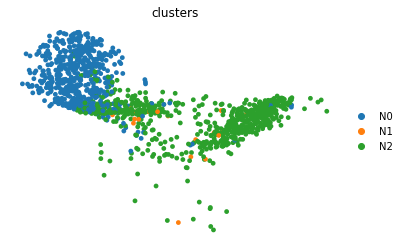

... storing 'clusters' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


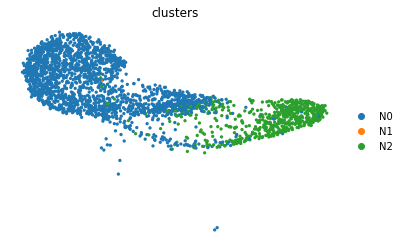

In [11]:
import scanpy as sc
sc.pl.umap(sample_p24, color = 'clusters', frameon=False)
sc.pl.umap(sample_mp24, color = 'clusters', frameon=False)

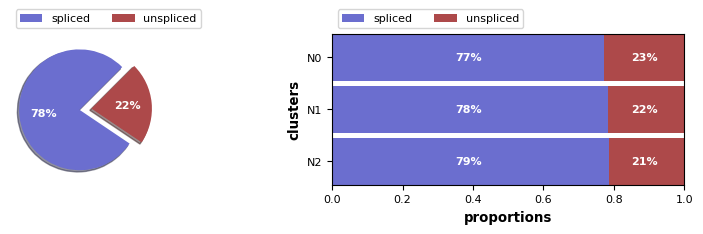

In [12]:
scv.pl.proportions(sample_p24)

In [13]:
scv.pp.filter_and_normalize(sample_p24, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(sample_p24, n_pcs=30, n_neighbors=30)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 30354 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [14]:
scv.tl.recover_dynamics(sample_p24, n_jobs = 10)

recovering dynamics (using 10/12 cores)


  0%|          | 0/863 [00:00<?, ?gene/s]

    finished (0:00:22) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [15]:
scv.tl.velocity(sample_p24, mode = 'dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [16]:
scv.tl.velocity_graph(sample_p24)

computing velocity graph (using 1/12 cores)


  0%|          | 0/1314 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


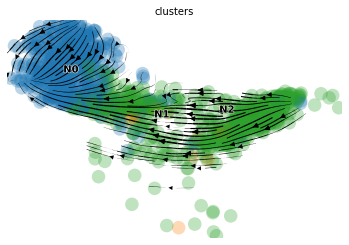

In [17]:
scv.pl.velocity_embedding_stream(sample_p24, basis='umap')

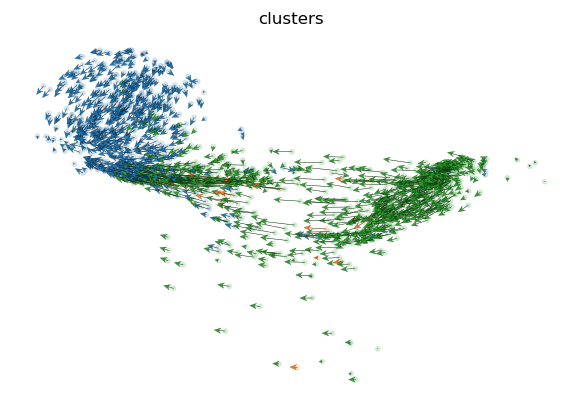

In [18]:
scv.pl.velocity_embedding(sample_p24, arrow_length=3, arrow_size=2, dpi=120)

In [19]:
scv.tl.rank_velocity_genes(sample_p24, min_corr=.3)

df = scv.DataFrame(sample_p24.uns['rank_velocity_genes']['names'])
df.head()

computing velocity clusters
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
    finished (0:00:00) --> added 
    'velocity_clusters', clusters based on louvain modularity on velocity vector field (adata.obs)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Srgn,Smap2,Gm20406,Mcl1,Marcks,Actr3,Tgif1,Atp6v1a,Tnfaip2,Mfsd14b,Klra17,Tspan13
1,Ptafr,Slc16a3,Ago2,Sgpl1,Ctsb,Ripk1,Pnkp,Lrrfip2,Wfdc17,Bhlhe40,H3f3b,Stk24
2,Zc3h12a,Gsr,Akap13,Basp1,Basp1,Klra17,Gbp3,Smad3,Ifi214,Ninj1,Ripk1,Sec24a
3,Smim3,Smad3,Atp6v1c1,Ralgds,Ralgds,Gch1,Cd300c2,Gns,Plaur,Ctsb,Sell,Arpc3
4,H3f3a,Mreg,Slc38a1,Clic1,Sqstm1,Wbp1l,Zc3h12a,Atp6v1c1,Ptpn6,Ralgds,Actb,Il1f9


computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


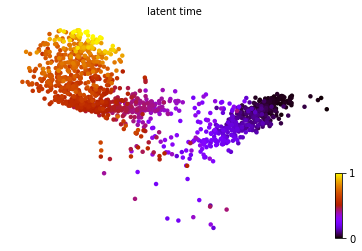

In [20]:
scv.tl.latent_time(sample_p24)
scv.pl.scatter(sample_p24, color='latent_time', color_map='gnuplot', size=80)

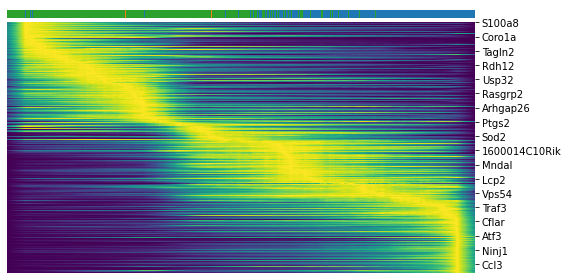

In [29]:
top_genes = sample_p24.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(sample_p24, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

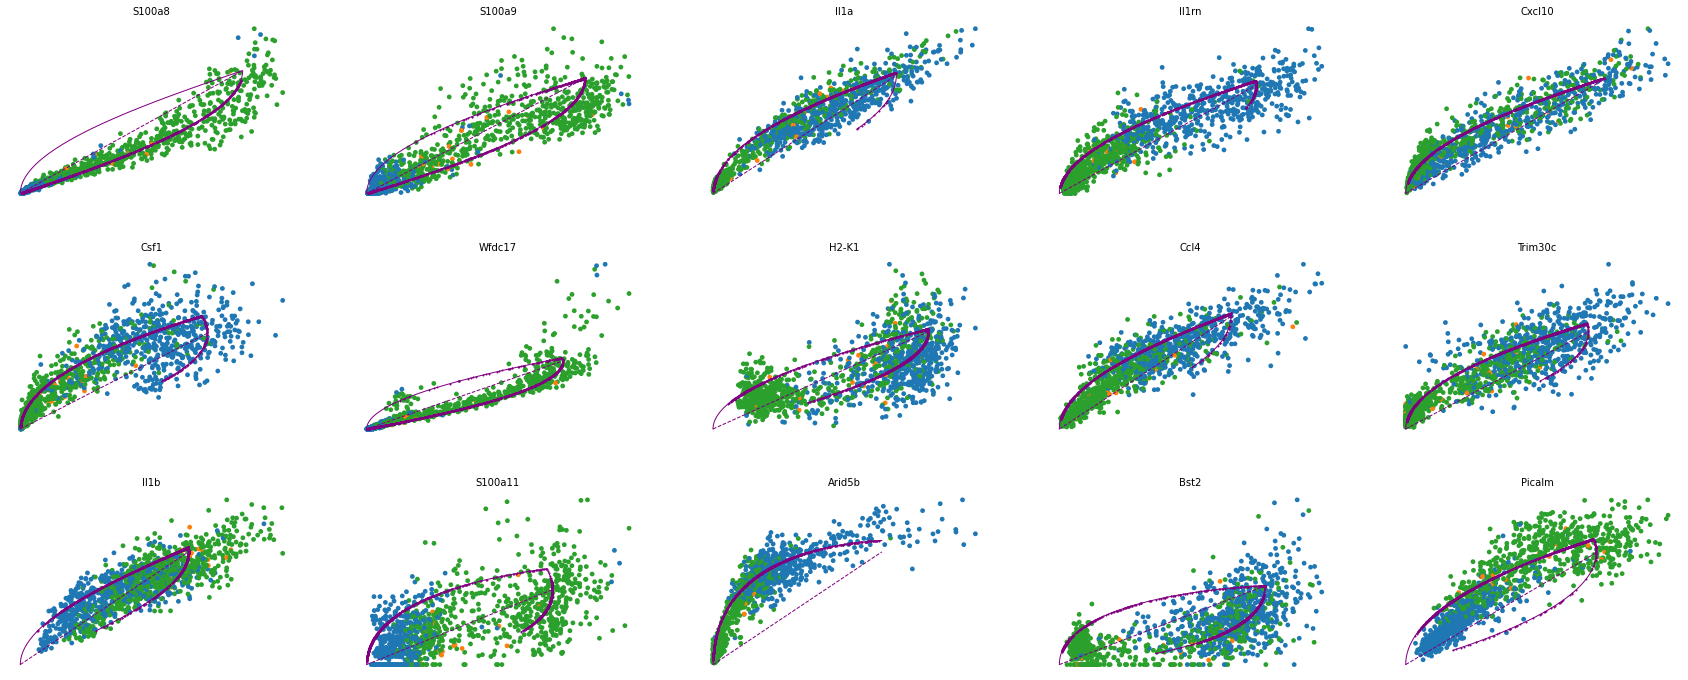

In [22]:
top_genes = sample_p24.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(sample_p24, basis=top_genes[:15], ncols=5, frameon=False)

In [ ]:
# MP24

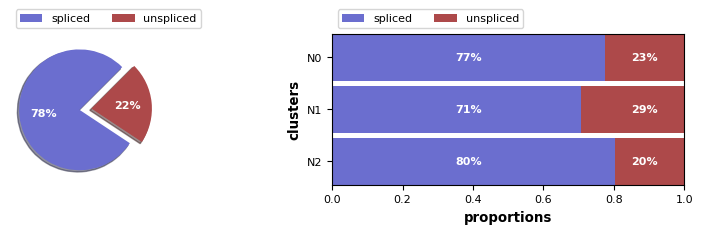

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 29551 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [25]:
scv.pl.proportions(sample_mp24)
scv.pp.filter_and_normalize(sample_mp24, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(sample_mp24, n_pcs=30, n_neighbors=30)

In [26]:
scv.tl.recover_dynamics(sample_mp24, n_jobs = 10)

recovering dynamics (using 10/12 cores)


  0%|          | 0/697 [00:00<?, ?gene/s]

    finished (0:00:37) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [27]:
scv.tl.velocity(sample_mp24, mode = 'dynamical')
scv.tl.velocity_graph(sample_mp24)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/2765 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


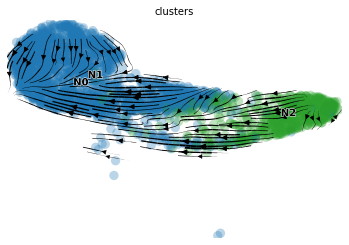

In [28]:
scv.pl.velocity_embedding_stream(sample_mp24, basis='umap')

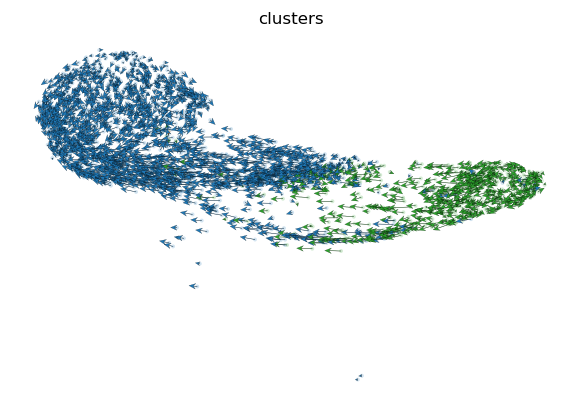

In [30]:
scv.pl.velocity_embedding(sample_mp24, arrow_length=3, arrow_size=2, dpi=120)

In [32]:
scv.tl.rank_velocity_genes(sample_mp24, min_corr=.3)

df = scv.DataFrame(sample_mp24.uns['rank_velocity_genes']['names'])
df.head()

computing velocity clusters
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
    finished (0:00:00) --> added 
    'velocity_clusters', clusters based on louvain modularity on velocity vector field (adata.obs)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Gns,Smad3,Gla,Cd69,Smad3,Sell,Adam8,Ngp,Esd,Ngp,Esd,Tspan13,Plcxd2,Akap13
1,Zmiz1,Tfeb,Rilpl2,Dedd2,Gm39459,Txnip,Wfdc17,Txnip,Wfdc17,Batf,Svil,Slc31a2,Slc31a2,Rcan1
2,Sgpl1,Zc3h12c,Basp1,Icam1,Plau,Thbs1,Esd,Thbs1,Fam129b,Prnp,Wfdc17,Slc38a1,Rcan1,Ngp
3,C9orf72,Rcan1,Arid5b,Sqstm1,Tgfbr1,Lst1,Ifi204,Lgals3,Adam8,Thbs1,Adam8,9930022D16Rik,Ilf3,Abcc5
4,Mreg,Plcxd2,Ptpre,Fndc3a,Slc38a1,Pycard,Snx10,Mefv,Snx10,Rnh1,Snx10,Xrcc5,Xrcc5,Plcxd2


computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


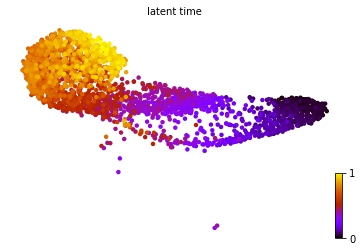

In [33]:
scv.tl.latent_time(sample_mp24)
scv.pl.scatter(sample_mp24, color='latent_time', color_map='gnuplot', size=80)

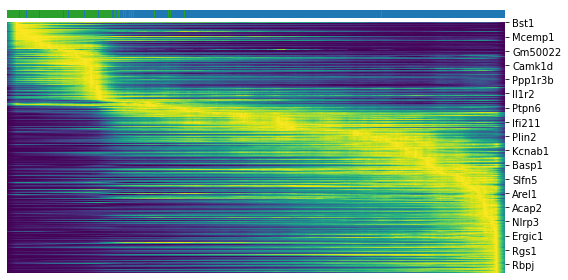

In [34]:
top_genes = sample_mp24.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(sample_mp24, var_names=top_genes, sortby='latent_time', col_color='clusters', n_convolve=100)

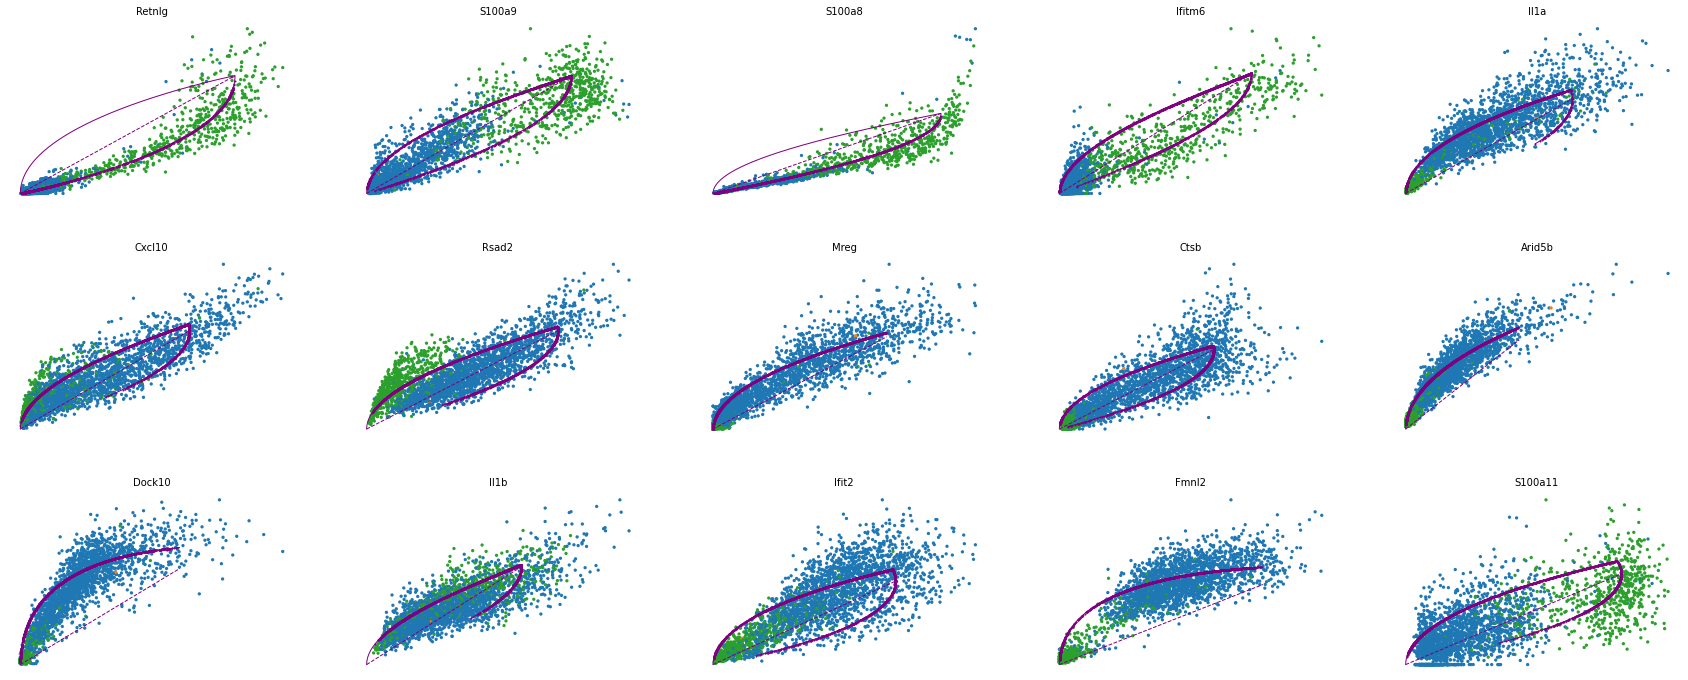

In [35]:
top_genes = sample_mp24.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(sample_mp24, basis=top_genes[:15], ncols=5, frameon=False)

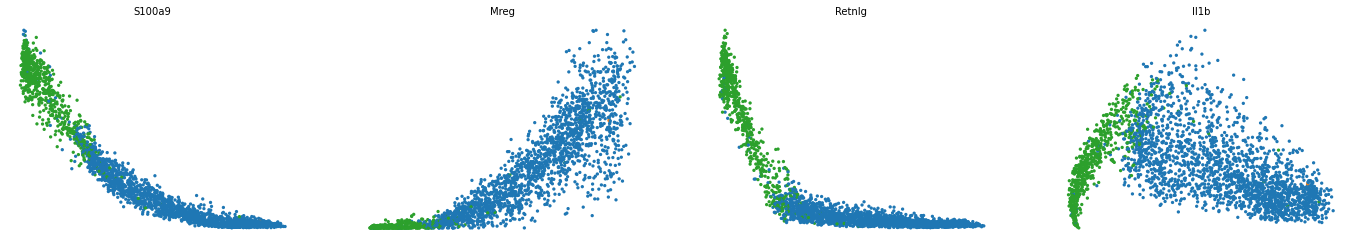

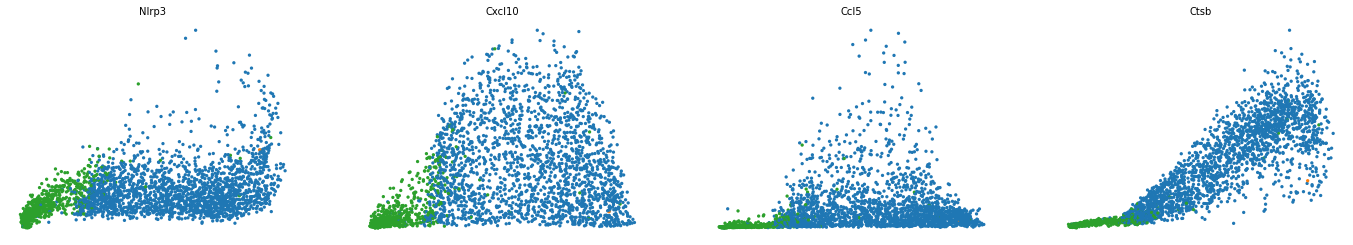

In [41]:
var_names = ['S100a9', 'Mreg', 'Retnlg', 'Il1b']
#scv.pl.scatter(sample_mp24, var_names, frameon=False)
scv.pl.scatter(sample_mp24, x='latent_time', y=var_names, frameon=False)
var_names = ['Nlrp3', 'Cxcl10', 'Ccl5', 'Ctsb']
scv.pl.scatter(sample_mp24, x='latent_time', y=var_names, frameon=False)

In [36]:
scv.tl.rank_dynamical_genes(sample_mp24, groupby='clusters')
df = scv.get_df(sample_mp24, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:00) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


,N0,N1,N2
0,S100a9,Mreg,Retnlg
1,Il1a,Trim30c,S100a9
2,Cxcl10,Ctsb,Il1b
3,Mreg,Npc2,Tnfaip3
4,Rsad2,Ccl4,Ifitm6
